In [9]:
print("Week-5 PPQ Demo Notebook")
!pip install pillow numpy opencv-python


Week-5 PPQ Demo Notebook


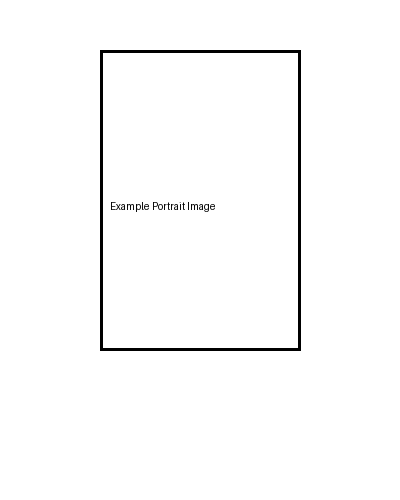

In [10]:
from PIL import Image, ImageDraw, ImageFont

def create_placeholder():
    img = Image.new("RGB", (400, 500), color="white")
    d = ImageDraw.Draw(img)
    d.rectangle([100, 50, 300, 350], outline="black", width=3)  # fake head area
    d.text((110, 200), "Example Portrait Image", fill="black")
    return img

img = create_placeholder()
img


In [11]:
from PIL import ImageEnhance, ImageFilter, ImageOps

def make_professional_variant(img):
    img2 = ImageOps.autocontrast(img)
    img2 = ImageEnhance.Brightness(img2).enhance(1.2)
    img2 = ImageEnhance.Contrast(img2).enhance(1.2)
    img2 = img2.filter(ImageFilter.SHARPEN)
    return img2

def make_flawed_variant(img):
    img2 = ImageEnhance.Brightness(img).enhance(0.6)
    img2 = ImageEnhance.Contrast(img2).enhance(0.8)
    img2 = img2.filter(ImageFilter.GaussianBlur(radius=2))
    return img2

img_prof = make_professional_variant(img)
img_flawed = make_flawed_variant(img)

img_prof, img_flawed


(<PIL.Image.Image image mode=RGB size=400x500>,
 <PIL.Image.Image image mode=RGB size=400x500>)

In [12]:
import numpy as np
import cv2

def brightness_score(img):
    gray = np.array(img.convert("L"))
    return gray.mean() / 255.0

def sharpness_score(img):
    arr = np.array(img)
    lap = cv2.Laplacian(arr, cv2.CV_64F).var()
    return min(lap / 500.0, 1.0)

def background_score(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    density = edges.mean() / 255.0
    return 1 - min(density, 1.0)  # simpler background → higher score

def professionalism_score(img):
    b = brightness_score(img)
    s = sharpness_score(img)
    bg = background_score(img)
    final = 0.4*b + 0.3*s + 0.3*bg
    return final, (b, s, bg)


In [13]:
for name, image in [
    ("Original Example", img),
    ("Professional-like", img_prof),
    ("Flawed", img_flawed)
]:
    score, (b, s, bg) = professionalism_score(image)
    print("===" , name, "===")
    print("Professionalism Score:", round(score, 3))
    print("Brightness:", round(b, 3))
    print("Sharpness:", round(s, 3))
    print("Background simplicity:", round(bg, 3))
    print()


=== Original Example ===
Professionalism Score: 0.99
Brightness: 0.984
Sharpness: 1.0
Background simplicity: 0.988

=== Professional-like ===
Professionalism Score: 0.99
Brightness: 0.984
Sharpness: 1.0
Background simplicity: 0.988

=== Flawed ===
Professionalism Score: 0.537
Brightness: 0.588
Sharpness: 0.005
Background simplicity: 1.0



In [15]:
def feedback(img):
    score, (b, s, bg) = professionalism_score(img)
    fb = []

    if b < 0.4:
        fb.append("Lighting too dark.")
    elif b > 0.9:
        fb.append("Lighting too strong / overexposed.")

    if s < 0.3:
        fb.append("Image blurry or lacks definition.")

    if bg < 0.4:
        fb.append("Background too complex or messy.")

    if fb:
        fb.append(f"Overall professionalism score: {score:.2f}")
    else:
        fb.append(f"Looks professional (score {score:.2f}).")

    return fb


print("Feedback for Original:", feedback(img))
print("Feedback for Professional-like:", feedback(img_prof))
print("Feedback for Flawed:", feedback(img_flawed))


Feedback for Original: ['Lighting too strong / overexposed.', 'Overall professionalism score: 0.99']
Feedback for Professional-like: ['Lighting too strong / overexposed.', 'Overall professionalism score: 0.99']
Feedback for Flawed: ['Image blurry or lacks definition.', 'Overall professionalism score: 0.54']
